# DBSCAN
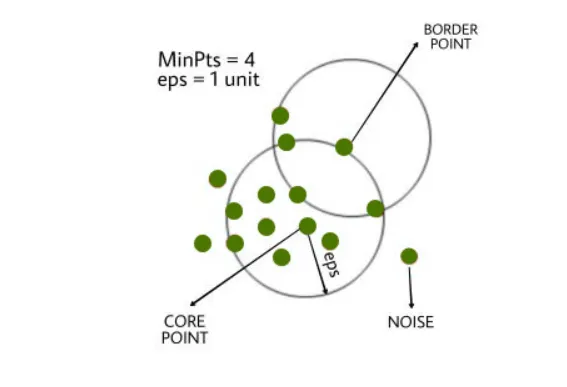

El algoritmo DBSCAN (Density-based spatial clustering of applications with noise) es un algoritmo de agrupamiento de datos no supervisado que identifica grupos de puntos en un conjunto de datos basado en la densidad local de los puntos.

El algoritmo DBSCAN funciona de la siguiente manera:

1. Para cada punto del conjunto de datos, se calcula el número de puntos a una distancia máxima ε de él. Esta zona se denomina ε-vecindad del punto.
2. Un punto se considera un punto central si tiene al menos $k$ puntos en su ε-vecindad, incluida él mismo.
3. Dos puntos centrales que se encuentren dentro de la ε-vecindad del otro se consideran miembros del mismo clúster.
4. Los puntos que no son puntos centrales se consideran **anomalias**.

El algoritmo DBSCAN tiene dos parámetros principales:

* ε: la distancia máxima a la que se consideran vecinos dos puntos.
* *k*: el número mínimo de puntos necesarios para que un punto se considere un punto central.

El algoritmo DBSCAN es un algoritmo versátil que puede ser utilizado para una amplia gama de aplicaciones, incluyendo:

* Segmentación de imágenes
* Análisis de datos espaciales
* Detección de anomalías

Este algoritmo funciona bien si todos los clusters son lo suficientemente densos y están bien separados por regiones de baja-densidad. La clase **DBSCAN** en *Scikit-Learn* es simple de usar. Probemos con el dataset moons:

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)

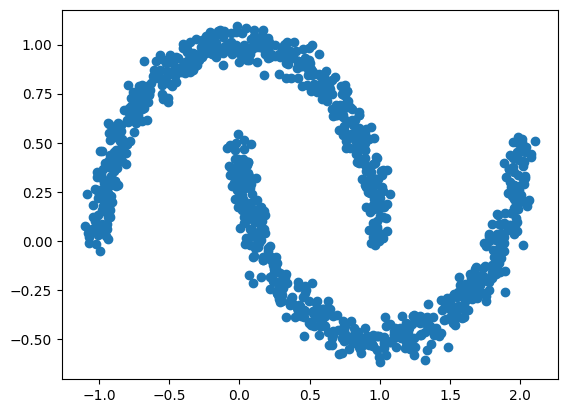

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1])

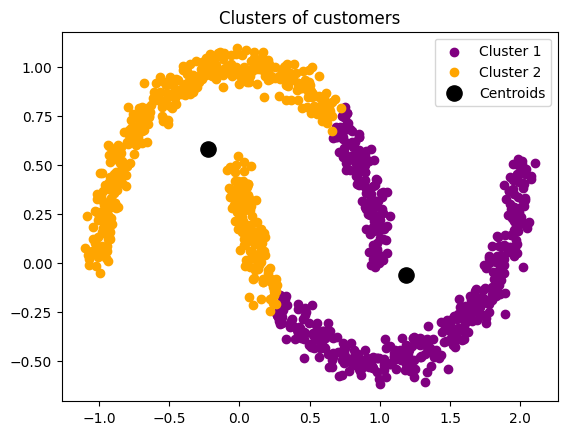

In [3]:
from sklearn.cluster import KMeans # importamos KMeans

km1 = KMeans(n_clusters = 2, init='k-means++') # Crear el modelo
#km1.fit(X) # ajuste sus parametros (aprendizaje) con respecto a X
y_kmeans = km1.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'purple', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'orange', label='Cluster 2')

# Incluir los centroides
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s=120,c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [4]:
dbscan = DBSCAN(eps=0.05, min_samples=5) # epsilon-vecindad, num puntos
dbscan.fit(X) # No hay predict

DBSCAN(eps=0.05)

The labels of all the instances are now available in the `labels_ instance` variable:

In [5]:
dbscan.labels_

array([ 0,  1,  3,  1,  1,  1,  2,  2,  1,  3,  1,  1,  1,  1,  4,  1,  2,
        3,  3,  1,  2,  2,  4,  1,  4,  4,  1,  1, -1, -1,  1,  1,  1,  2,
        4,  3, -1,  2,  1,  1,  3,  1,  2,  2,  2,  2,  1,  1,  3,  3,  0,
        2,  3,  0,  3,  1,  1,  1,  1,  3,  3,  1,  3,  4,  3,  1,  1, -1,
        2,  3,  3, -1,  2,  5,  4,  1,  1,  0, -1,  1,  2,  1,  0,  2,  1,
        4,  4,  3,  1,  4,  3,  1,  1,  3,  3,  2,  2,  2,  2,  3,  1,  1,
        1,  3,  0,  1, -1,  2,  4,  3,  3,  1,  0,  3,  3,  3,  1,  1,  0,
        0,  2,  1,  1,  1,  1,  1,  0, -1,  5,  3,  1,  2,  2,  1,  5,  1,
        4,  4,  1,  1,  3,  5,  4,  3,  3,  2, -1,  2,  4,  3,  1,  2,  3,
        3,  1,  2,  1,  1,  2,  1,  1,  2,  2,  4,  0,  1,  1,  3,  3,  0,
        1,  2,  5,  1,  4,  1,  4,  0,  3,  3,  1,  1,  5,  1,  4,  1,  2,
        5,  3,  4, -1,  3,  2,  1,  3,  4,  1,  1,  3,  2,  1,  4,  3,  4,
        1,  4,  3,  0,  2,  0,  2,  3,  3,  3,  0,  0,  0,  1,  1,  4,  2,
        4,  2,  1,  1,  1

Tenga en cuenta que algunas instancias tienen un índice de clúster igual a -1: esto significa que el algoritmo las considera **anomalías**.

Los índices de las instancias centrales están disponibles en la variable `core_sample_indices_`, y las instancias centrales en sí mismas están disponibles en la variable `components_`.

In [6]:
print(len(dbscan.core_sample_indices_)) # consultar los indices de los core points
dbscan.core_sample_indices_

800


array([  0,   1,   3,   4,   6,   8,   9,  10,  11,  12,  14,  15,  16,
        17,  18,  20,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,
        37,  38,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  54,  55,  56,  57,  58,  59,  60,  61,  62,  64,  65,  66,
        69,  72,  73,  74,  75,  76,  77,  79,  80,  81,  83,  84,  85,
        88,  90,  91,  92,  93,  95,  96,  97,  98, 100, 101, 103, 104,
       105, 107, 108, 110, 112, 113, 114, 115, 116, 117, 118, 119, 122,
       123, 124, 125, 128, 130, 131, 132, 134, 135, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 147, 149, 150, 151, 154, 156, 160, 161,
       162, 165, 166, 167, 170, 171, 172, 173, 175, 177, 178, 179, 180,
       181, 182, 183, 185, 186, 187, 189, 191, 194, 196, 197, 198, 199,
       200, 201, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 222, 223, 226, 227, 228, 229, 230, 231,
       232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 244, 24

In [7]:
dbscan.components_ # devuelve las características de los core points

array([[ 0.02324933,  0.21316094],
       [-0.67490304,  0.77962041],
       [-1.03145229,  0.1103348 ],
       ...,
       [ 2.00380041,  0.23226416],
       [ 0.085948  ,  0.28754107],
       [-0.1635953 ,  0.93570338]])

In [8]:
len(dbscan.labels_) #

1000

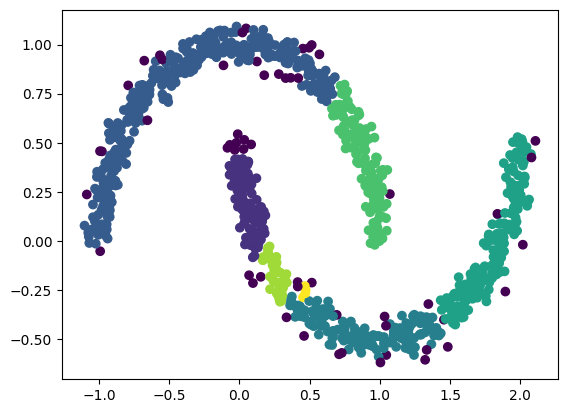

In [9]:
plt.scatter(X[:,0], X[:, 1], c=dbscan.labels_)

<Axes: xlabel='x', ylabel='y'>

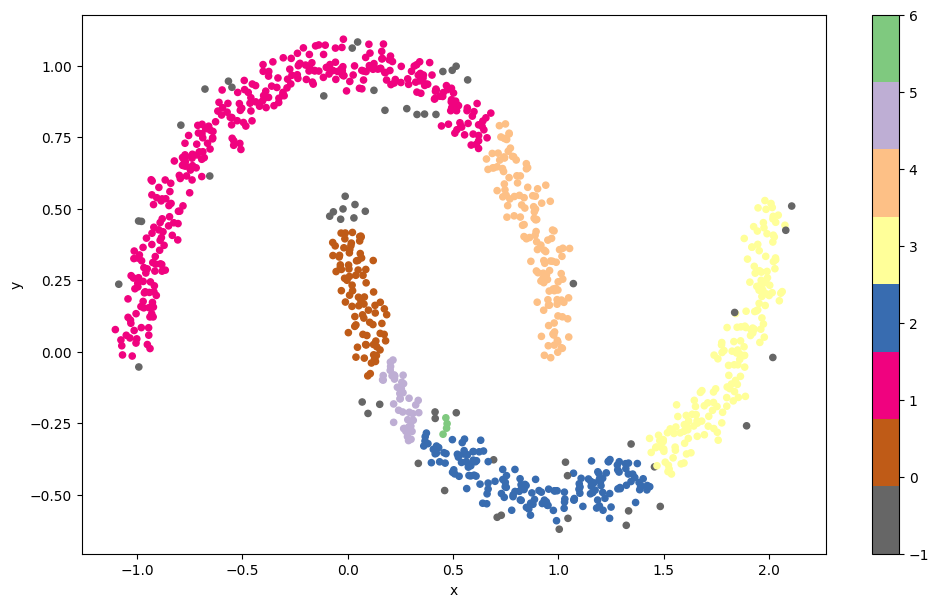

In [10]:
import pandas as pd
df = pd.DataFrame(X).rename(columns={0: 'x', 1: 'y'})
df.plot(kind='scatter', x='x', y ='y', c=dbscan.labels_, cmap='Accent_r', figsize=(12,7))

# Optimizando sus hiperparámetros

In [11]:
import numpy as np
from sklearn.metrics import silhouette_score

# Score: Regular
# eps=0.05, min_samples=5
epsilons = [0.05, 0.1, 0.2, 0.3]
min_s = np.arange(5,11,1)

best_sill, b_eps, b_ms = -1.0, 0, 0

for e in epsilons:
  for ms in min_s:
    dbscan = DBSCAN(eps=e, min_samples=ms) # epsilon-vecindad, num puntos
    dbscan.fit(X)
    try:
      sil_sc = silhouette_score(X, dbscan.labels_) # X: puntos clusterizados y predicciones
    except:
      print('No se puede calcular!')
    print('Current test: \nEpsilon: ', e, '\tMin Samples: ', ms, '\n')
    if(sil_sc > best_sill):
      best_sill, b_eps, b_ms = sil_sc, e, ms # actualizamos

print('Best test: \nEpsilon: ', e, '\nMin Samples: ', ms, '\nBest Silhouette: ', best_sill)

Current test: 
Epsilon:  0.05 	Min Samples:  5 

Current test: 
Epsilon:  0.05 	Min Samples:  6 

Current test: 
Epsilon:  0.05 	Min Samples:  7 

Current test: 
Epsilon:  0.05 	Min Samples:  8 

Current test: 
Epsilon:  0.05 	Min Samples:  9 

Current test: 
Epsilon:  0.05 	Min Samples:  10 

Current test: 
Epsilon:  0.1 	Min Samples:  5 

Current test: 
Epsilon:  0.1 	Min Samples:  6 

Current test: 
Epsilon:  0.1 	Min Samples:  7 

Current test: 
Epsilon:  0.1 	Min Samples:  8 

Current test: 
Epsilon:  0.1 	Min Samples:  9 

Current test: 
Epsilon:  0.1 	Min Samples:  10 

Current test: 
Epsilon:  0.2 	Min Samples:  5 

Current test: 
Epsilon:  0.2 	Min Samples:  6 

Current test: 
Epsilon:  0.2 	Min Samples:  7 

Current test: 
Epsilon:  0.2 	Min Samples:  8 

Current test: 
Epsilon:  0.2 	Min Samples:  9 

Current test: 
Epsilon:  0.2 	Min Samples:  10 

Current test: 
Epsilon:  0.3 	Min Samples:  5 

Current test: 
Epsilon:  0.3 	Min Samples:  6 

Current test: 
Epsilon:  0.3 	M

# Actividad en clase
Probemos DBSCAN con el siguiente dataset:

In [12]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
print(california_housing.feature_names)
print(california_housing.DESCR)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousan

In [13]:
import pandas as pd

df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = pd.Series(california_housing.target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Probemos DBSCAN con las siguientes características: `Latitude` y `Longitude`.

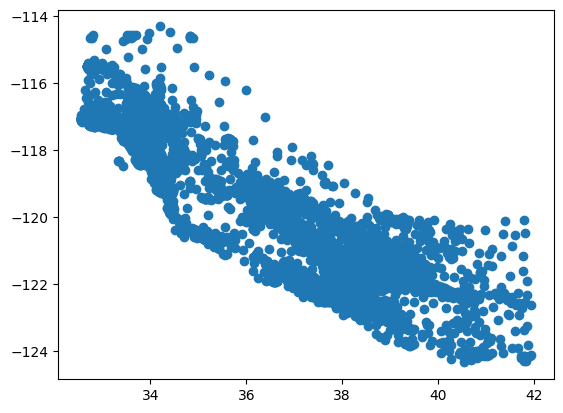

In [14]:
plt.scatter(df.Latitude, df.Longitude)

* ¿Cuáles son los mejores hiperparámetros para las 2 características?
* ¿Cuáles son los mejores hiperparámetros para todas las características?

In [15]:
epsilons = [0.05, 0.1, 0.2, 0.3]
min_s = np.arange(5,11,1)

best_sill, b_eps, b_ms = -1.0, 0, 0

for e in epsilons:
  for ms in min_s:
    dbscan = DBSCAN(eps=e, min_samples=ms) # epsilon-vecindad, num puntos
    dbscan.fit(X)
    try:
      sil_sc = silhouette_score(X, dbscan.labels_) # X: puntos clusterizados y predicciones
    except:
      print('No se puede calcular!')
    print('Current test: \nEpsilon: ', e, '\tMin Samples: ', ms, '\n')
    if(sil_sc > best_sill):
      best_sill, b_eps, b_ms = sil_sc, e, ms # actualizamos

print('Best test: \nEpsilon: ', e, '\nMin Samples: ', ms, '\nBest Silhouette: ', best_sill)

Current test: 
Epsilon:  0.05 	Min Samples:  5 

Current test: 
Epsilon:  0.05 	Min Samples:  6 

Current test: 
Epsilon:  0.05 	Min Samples:  7 

Current test: 
Epsilon:  0.05 	Min Samples:  8 

Current test: 
Epsilon:  0.05 	Min Samples:  9 

Current test: 
Epsilon:  0.05 	Min Samples:  10 

Current test: 
Epsilon:  0.1 	Min Samples:  5 

Current test: 
Epsilon:  0.1 	Min Samples:  6 

Current test: 
Epsilon:  0.1 	Min Samples:  7 

Current test: 
Epsilon:  0.1 	Min Samples:  8 

Current test: 
Epsilon:  0.1 	Min Samples:  9 

Current test: 
Epsilon:  0.1 	Min Samples:  10 

Current test: 
Epsilon:  0.2 	Min Samples:  5 

Current test: 
Epsilon:  0.2 	Min Samples:  6 

Current test: 
Epsilon:  0.2 	Min Samples:  7 

Current test: 
Epsilon:  0.2 	Min Samples:  8 

Current test: 
Epsilon:  0.2 	Min Samples:  9 

Current test: 
Epsilon:  0.2 	Min Samples:  10 

Current test: 
Epsilon:  0.3 	Min Samples:  5 

Current test: 
Epsilon:  0.3 	Min Samples:  6 

Current test: 
Epsilon:  0.3 	M